In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [47]:
def plot_data(X, y):
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Paired)
  plt.show()

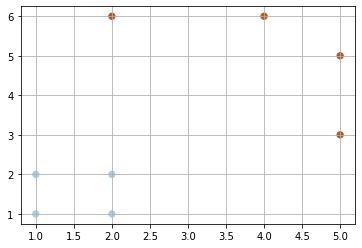

In [48]:
# generate and plot data

X = np.array([(1,1),(1,2),(2,1),(2,2),(2,6),(4,6),(5,5),(5,3)])
y = [0,0,0,0,1,1,1,1]

plt.grid()
plot_data(X, y)


In [49]:
# fit svm model

def fit_svm(X, y):
  clf = svm.SVC(kernel='linear') 
  clf.fit(X,y)
  return clf

In [50]:
# print support vectors

def print_svm_data(clf):
  # Support vectors
  sv = clf.support_vectors_
  print(f'Support vectors: \n {sv}')

  # Number of support vectors for each class.
  print(f'Number of support vectors: {clf.n_support_}')

  w = clf.coef_
  b = clf.intercept_

  print(f'w: {w}')
  print(f'b: {b}')

In [51]:
clf = fit_svm(X, y)
print_svm_data(clf)

Support vectors: 
 [[2. 2.]
 [2. 6.]
 [5. 3.]]
Number of support vectors: [1 2]
w: [[0.49984 0.49984]]
b: [-2.99893333]


In [52]:
def plot_svm(X, y, sv, grid=False, title='SVM'):
  # visualize data, support vectors, decision boundary

  # plot data points
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Paired)

  # mark support vectors
  plt.scatter(sv[:,0], sv[:,1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

  # plot decision boundary/maximum margin hyperplane and margins
  #  (xlim, ylim, xx, yy... refer to the axes, not the input and output of the classifier)
  # get axes
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  #  create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  # run classifier for all points in the mesh
  Z = clf.decision_function(xy).reshape(XX.shape)
  # plot decision boundary and margins
  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

  if grid:
    plt.grid()

  plt.title(title)
  plt.show()

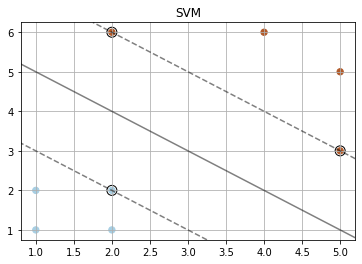

In [53]:
sv = clf.support_vectors_
plot_svm(X, y, sv, grid=True)

In [54]:
# generate and plot data
# help(make_blobs)
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

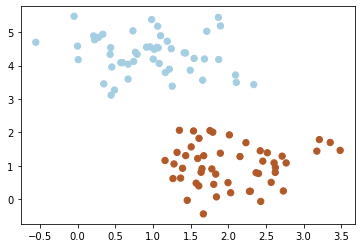

In [55]:
plot_data(X, y)

In [56]:
clf = fit_svm(X, y)
print_svm_data(clf)

Support vectors: 
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.06383637]
 [1.53853211 2.04370263]]
Number of support vectors: [2 2]
w: [[ 0.26611709 -1.59483876]]
b: [3.85008672]


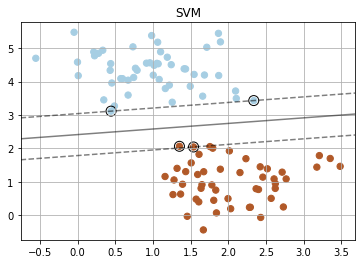

In [57]:
sv = clf.support_vectors_
plot_svm(X, y, sv, grid=True)

Regularization

In [58]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.90)

In [59]:
# fit svm model
# with strong regularisation (wide margin, even if misclassifications)
# test different C values!

def fit_svm_regularisation(X, y, C=1):
  clf = svm.SVC(kernel='linear', C=C) 
  clf.fit(X,y)
  return clf

Support vectors: 
 [[0.17726291 2.52107051]
 [1.39536627 2.92116801]
 [2.00173069 3.19244409]
 [0.03257241 3.02577118]
 [3.01904924 2.99485822]
 [2.67110571 3.09080417]
 [0.24443842 2.75013299]
 [1.38966082 2.2863768 ]
 [1.66362932 2.56200102]
 [1.99385008 2.43967211]
 [0.99945646 2.64692273]
 [1.60703832 2.63424251]
 [1.2801644  2.61672212]]
Number of support vectors: [7 6]
w: [[ 0.18790098 -2.21995445]]
b: [5.71095448]


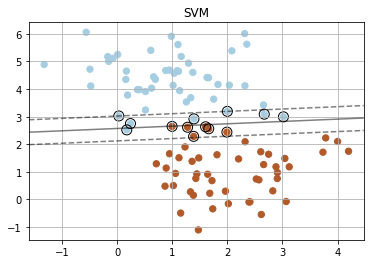

In [60]:
clf = fit_svm_regularisation(X, y)
print_svm_data(clf)
sv = clf.support_vectors_
plot_svm(X, y, sv, grid=True)

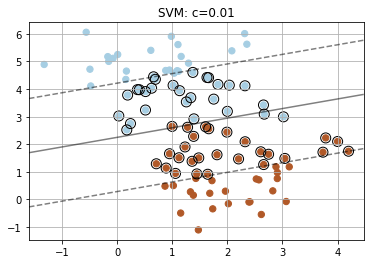

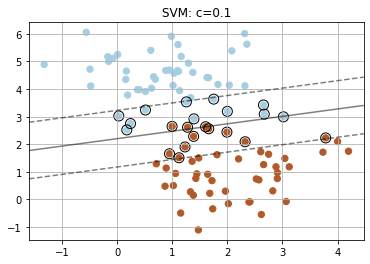

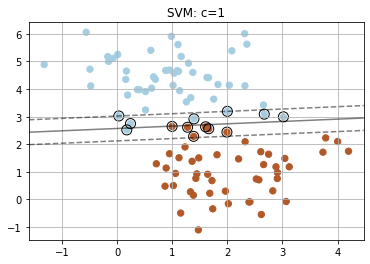

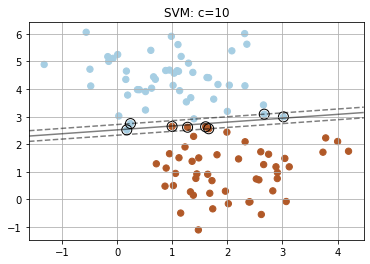

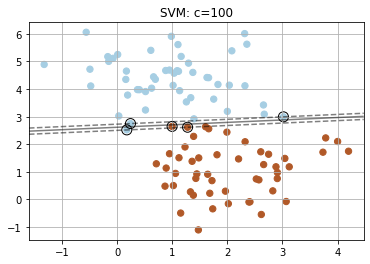

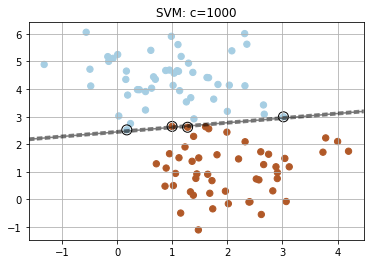

In [61]:
for c in [0.01, 0.1, 1, 10, 100, 1000]:
  clf = fit_svm_regularisation(X, y, c)
  sv = clf.support_vectors_
  plot_svm(X, y, sv, grid=True, title=f'SVM: c={c}')

Nonlinear

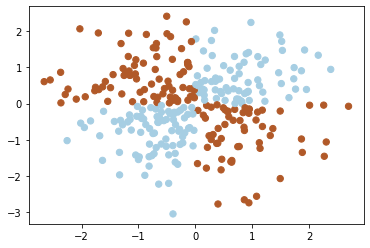

In [62]:
# generate and plot data
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Paired)
plt.show()

In [63]:
# fit svm model
def fit_non_linear(kernel='rbf', gamma=1):
  clf = svm.SVC(kernel=kernel, gamma=gamma)
  clf.fit(X,y)
  return clf

In [64]:
clf = fit_non_linear()
# print_svm_data(clf)

def print_svm_data_nonlinear(clf):
  # Support vectors
  sv = clf.support_vectors_
  print(f'Support vectors: \n {sv}')

  # Number of support vectors for each class.
  print(f'Number of support vectors: {clf.n_support_}')
  return sv

sv = print_svm_data_nonlinear(clf)

Support vectors: 
 [[ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.15494743  0.37816252]
 [-1.61389785 -0.21274028]
 [ 0.06651722  0.3024719 ]
 [ 0.72909056  0.12898291]
 [ 1.48825219  1.89588918]
 [ 0.20827498  0.97663904]
 [ 0.01050002  1.78587049]
 [ 0.12691209  0.40198936]
 [-0.69456786 -0.14963454]
 [ 0.1666735   0.63503144]
 [ 2.38314477  0.94447949]
 [-0.09845252 -0.66347829]
 [ 0.94942081  0.08755124]
 [-0.03928282 -1.1680935 ]
 [-0.36918184 -0.23937918]
 [-0.02432612 -0.73803091]
 [ 0.15650654  0.23218104]
 [-0.13288058 -0.29779088]
 [-0.30901297 -1.67600381]
 [-0.59631404 -0.0525673 ]
 [ 0.52389102  0.08842209]
 [ 1.95591231  0.39009332]
 [ 0.09772497  0.58295368]
 [-0.11816405 -0.6801782 ]
 [-0.04217145 -0.28688719]
 [-0.0616264  -0.10730528]
 [-1.84306955 -0.477974  ]
 [ 0.69845715  0.00377089]
 [-0.19065349 -0.39484951]
 [ 0.04949498  0.49383678]
 [-2.25556423 -1.02250684]
 [ 1.64813493  0.16422776]
 [ 0.81451982  0.05892559]
 [-0.30911444 -0.23346666]
 [ 0.3708

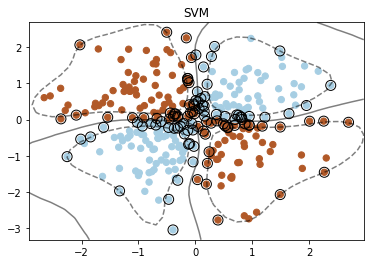

In [65]:
plot_svm(X, y, sv)

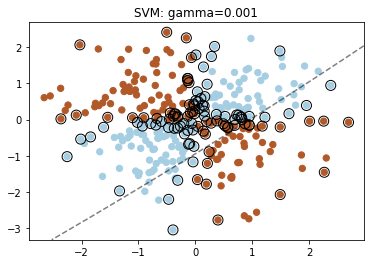

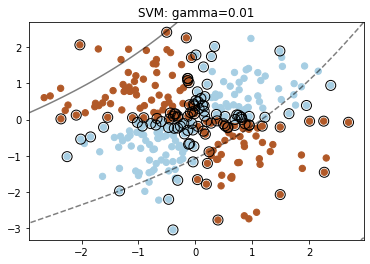

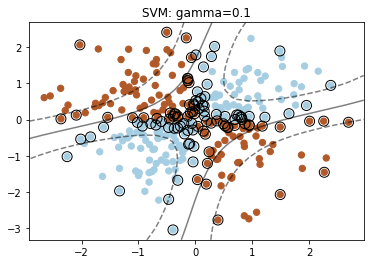

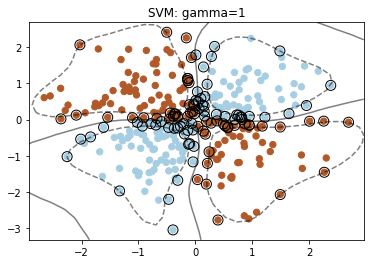

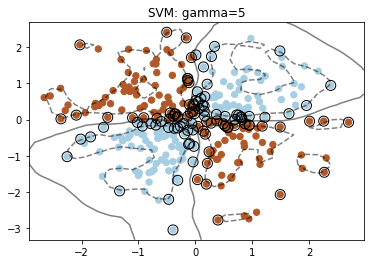

In [66]:
for gamma in [0.001, 0.01, 0.1, 1, 5]:
  clf = fit_non_linear(gamma=gamma)
  plot_svm(X, y, sv, title=f'SVM: gamma={gamma}')

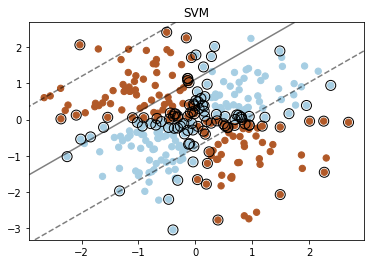

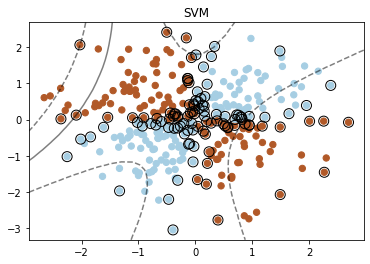

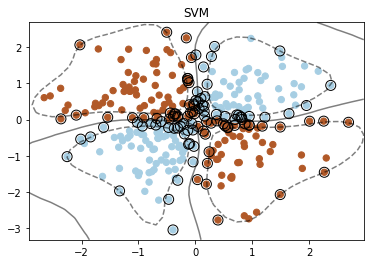

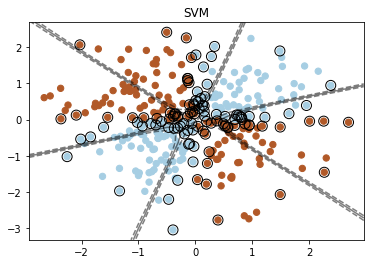

In [67]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = fit_non_linear(kernel=kernel)
  plot_svm(X, y, sv)